In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus = False)

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
n=3
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


In [3]:
ds_camshaft = pd.read_csv("/home/piai/바탕화면/빅데이터/1 Big Data 분석 기초/camshaft.csv")
ds_camshaft.head()

Length  Supp1  Supp2
0   601.4  598.0  601.6
1   601.6  599.8  600.4
2   598.0  600.0  598.4
3   601.4  599.8  600.0
4   599.4  600.0  596.8

In [4]:
data1 = ds_camshaft['Supp1']
stats.shapiro(data1)

ShapiroResult(statistic=0.9788166284561157, pvalue=0.1074606254696846)

In [5]:
statistic, p = stats.shapiro(data1)
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))
# print("Shapiro-Wilk Test : statistic = 0.9788166284561157, p-value=0.1074606254696846")

# dropna로 결측치 제거 하고 해야지 실습이 됨

Shapiro-Wilk Test : statistic=0.9788166284561157, p-value=0.1074606254696846


In [6]:
df = pd.DataFrame({"sample" : [3.6, 2.9, 2.8, 2.6, 3.4, 3.2, 2.2, 2.6, 2.6, 2.4, 
                               2.4, 2.6, 3.4, 2.4, 2.1, 2.6, 3.0, 2.4, 2.7, 2.4, 
                              2.6, 2.9, 2.9, 2.0, 2.7, 2.2, 2.8, 2.7, 1.8, 2.5, 
                              3.0, 3.2, 2.8, 2.6, 3.2, 3.1 ,2.9, 2.7, 2.7, 2.2]})
df.head()

sample
0     3.6
1     2.9
2     2.8
3     2.6
4     3.4

In [7]:
lower,upper = stats.norm.interval(0.95, loc= np.mean(df), scale= 0.397/np.sqrt(40))
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([2.57],[2.82])


/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [28]:
df = pd.DataFrame({'sample' : [54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 57.1, 55.2, 53.8, 
                              54.1, 54.1, 56.1, 55.0, 55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})
lower,upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale= stats.sem(df))
print("신뢰구간:({0},{1})".format(lower.round(2), upper.round(2)))

SyntaxError: invalid syntax (1104662602.py, line 1)

In [9]:
# step 귀무가설
# 대립가설


# step 유의수준 ~ 한다

# 검정통계량 p값이 ~ 나와서 비즈니스 만족도 ~ 됬다


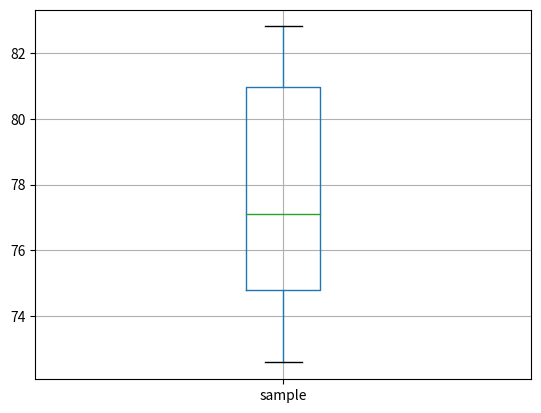

In [10]:
df = pd.DataFrame({'sample' : [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})
df.boxplot(['sample'])
plt.show()

In [11]:
statistic, p = stats.shapiro(df['sample'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9331594705581665, p-value=0.4796782433986664


In [12]:
t_result = stats.ttest_1samp(df, 76.7)

t,p = t_result.statistic.round(3), \
t_result.pvalue.round(3)

print("1-Sample t-test")
print("t통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t통계량 : [0.864]
p-value : [0.41]


In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus = False)

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

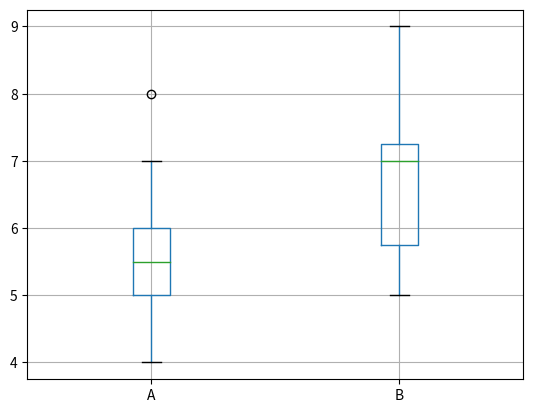

In [14]:
df = pd.DataFrame({'A':[6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7],
                  'B':[7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})

df.boxplot(['A','B'])
plt.show()

In [15]:
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9094840288162231, p-value=0.06230909377336502


In [16]:
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.8978102207183838, p-value=0.03752618283033371


In [17]:
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=0.2158392670118528, pvalue=0.6422286416307027)

In [18]:
t_result = stats.ttest_ind(df['A'], df['B'])
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [19]:
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-3.122
p:0.003


In [20]:
df1 = pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after' : [810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

t_result = stats.ttest_rel(df1, df2)

t,p=t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paried t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paried t-test
t:[-5.324]
p:[0.]


In [21]:
count =15
n_obs = 100
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

print( "1 Proportion test")
print( 'z : {0:0.3f}'.format(stat))
print( 'p : {0:0.3f}'.format(pval))

1 Proportion test
z : 1.400
p : 0.161


In [22]:
count = np.array([4,1])
nobs = np.array([1000, 1200])

stat, pval = proportions_ztest(count, nobs)

print( "2 Proportion test")
print( 'z : {0:0.3f}'.format(stat))
print( 'p : {0:0.3f}'.format(pval))

2 Proportion test
z : 1.553
p : 0.120


In [23]:
df = pd.DataFrame({'Work_1':[270, 228, 277],
                  'Work_2':[260, 285, 284],
                  'Work_3':[236, 225, 231],
                  'Work_4':[234, 262, 208]})

chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi-square test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))


chi-square test
chisq: 13.366
p: 0.038
degree pf freedom: 6
expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


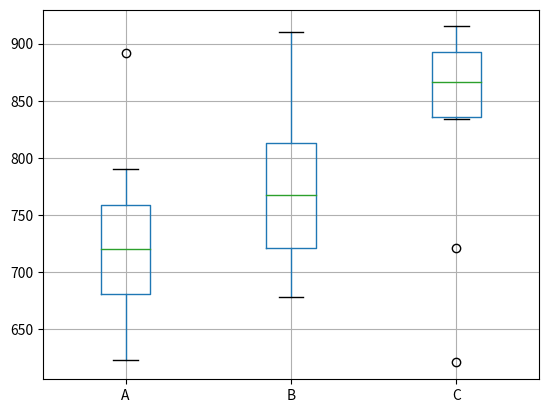

In [24]:
df = pd.DataFrame({'A':[892, 623, 721, 678, 723, 790, 720, 670, 690, 771],
                  'B':[721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                  'C':[621, 915, 888, 721, 894, 834, 841, 912, 845, 889]})

df.boxplot(['A', 'B', 'C'])
plt.show()

In [25]:
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['C'])
print("statistic={}, p-value={}".format(statistic,p))

stats.levene(df['A'], df['B'], df['C'])

statistic=0.9293239712715149, p-value=0.4412756860256195
statistic=0.924264669418335, p-value=0.39389991760253906
statistic=0.7892211675643921, p-value=0.010720876976847649


LeveneResult(statistic=0.13014245089698043, pvalue=0.8785177601959513)

In [26]:
f_result = stats.f_oneway(df['A'], df['B'], df['C'])

f,p = f_result.statistic.round(3),f_result.pvalue.round(3)

print("One-way")
print("F통계량:{}".format(f))
print("p-value:{}".format(p))

One-way
F통계량:4.263
p-value:0.025


In [27]:
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))

Correlation Analysis
corr:0.989
p-value:0.000
